# Linear Discriminant Analysis for Wine Classification

---

### Base Libraries

In [1]:
# Install extra libraries
!pip install ucimlrepo

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. The Dataset
Taken from [UCI Machine Learning Repository - Wine](https://archive.ics.uci.edu/dataset/109/wine)

### 1.1 Load data

In [3]:
from ucimlrepo import fetch_ucirepo

# Download from repository
wine = fetch_ucirepo(id=109)
X = wine.data.features
y = wine.data.targets

wine.variables

,name,role,type,demographic,description,units,missing_values
0,class,Target,Categorical,None,None,None,no
1,Alcohol,Feature,Continuous,None,None,None,no
2,Malicacid,Feature,Continuous,None,None,None,no
3,Ash,Feature,Continuous,None,None,None,no
4,Alcalinity_of_ash,Feature,Continuous,None,None,None,no
5,Magnesium,Feature,Integer,None,None,None,no
6,Total_phenols,Feature,Continuous,None,None,None,no
7,Flavanoids,Feature,Continuous,None,None,None,no
8,Nonflavanoid_phenols,Feature,Continuous,None,None,None,no
9,Proanthocyanins,Feature,Continuous,None,None,None,no


### 1.2 Train and Test Split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
y_classes = sorted(list(y_test['class'].unique()))

print(f"Train size: {len(X_train)}")
print(f"Test size: {len(X_test)}")

Train size: 142
Test size: 36


Are there missing values on the dataset? No.

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 95 to 9
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       142 non-null    float64
 1   Malicacid                     142 non-null    float64
 2   Ash                           142 non-null    float64
 3   Alcalinity_of_ash             142 non-null    float64
 4   Magnesium                     142 non-null    int64  
 5   Total_phenols                 142 non-null    float64
 6   Flavanoids                    142 non-null    float64
 7   Nonflavanoid_phenols          142 non-null    float64
 8   Proanthocyanins               142 non-null    float64
 9   Color_intensity               142 non-null    float64
 10  Hue                           142 non-null    float64
 11  0D280_0D315_of_diluted_wines  142 non-null    float64
 12  Proline                       142 non-null    int64  
dtypes: flo

## 2. Preparing data for LDA

### 2.1 Feature distributions

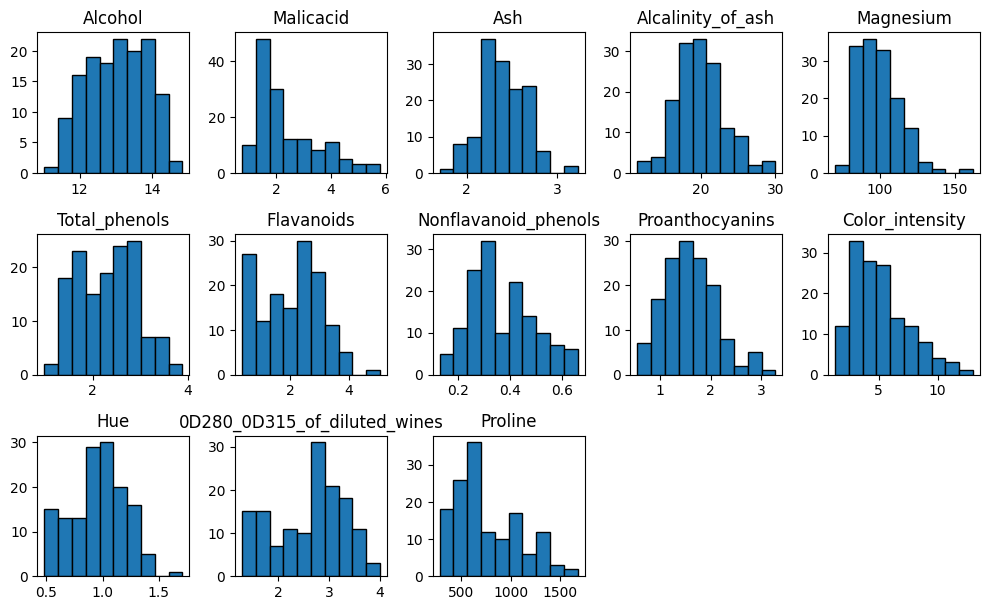

In [7]:
X_train.hist(layout=(5,5), figsize=(10,10), ec="k", grid=False)
plt.tight_layout()
plt.show()

#### Box-Cox Transformation Example

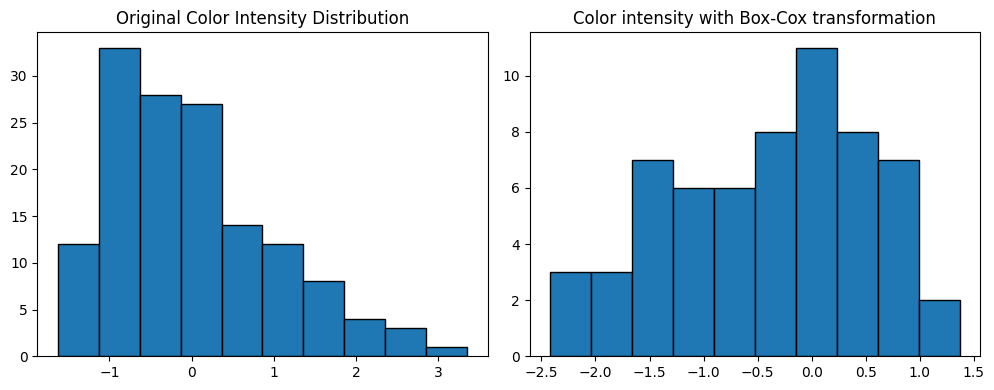

In [13]:
from scipy.stats import boxcox

# Apply transformation
color_intensity = X_train['Color_intensity']
corrected_color_intensity = boxcox(color_intensity, lmbda=0.2)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist(color_intensity, ec="k")
ax1.set_title('Original Color Intensity Distribution')
ax2.hist(corrected_color_intensity, ec="k")
ax2.set_title('Color intensity with Box-Cox transformation')
plt.tight_layout()
plt.show()

### 2.2 Normalization

In [9]:
from sklearn.preprocessing import StandardScaler

def standarize(df):
  scaled_data = StandardScaler().fit_transform(df)
  return pd.DataFrame(scaled_data, columns=df.columns)

X_train = standarize(X_train)

## 3. Training LDA model for Classification

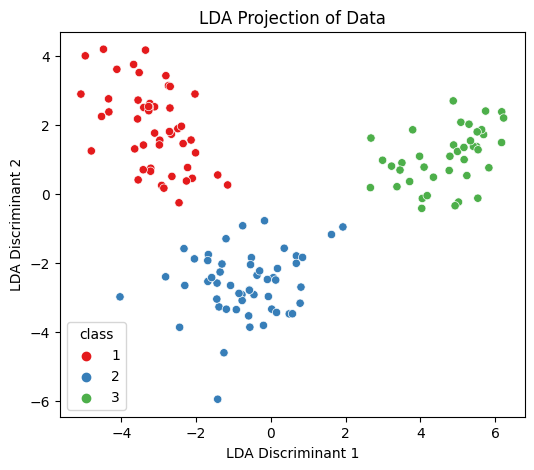

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Init LDA Model
lda = LinearDiscriminantAnalysis()

# Train
X_lda = lda.fit_transform(X_train, y_train['class'])

# Plot resulting discriminants
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y_train['class'], palette='Set1')
plt.title('LDA Projection of Data')
plt.xlabel('LDA Discriminant 1')
plt.ylabel('LDA Discriminant 2')
plt.show()

## 4. Testing and Performance

### 4.1 Classification Report - Metrics

In [11]:
from sklearn.metrics import classification_report

y_pred = lda.predict(standarize(X_test))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      0.89      0.94        18
           3       0.80      1.00      0.89         8

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.96      0.94      0.95        36



### 4.2 Confusion Matrix

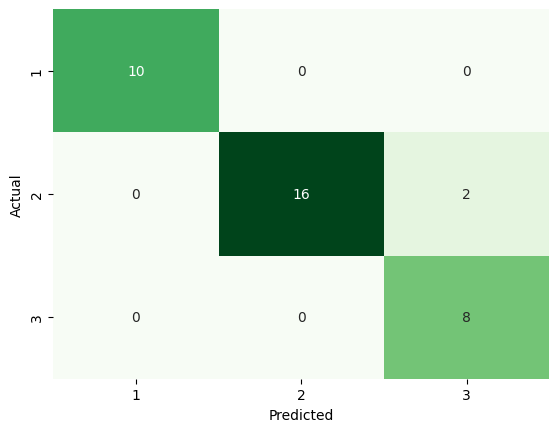

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=y_classes,
            yticklabels=y_classes)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()